# Title: Severity of road traffic accidents

In [1]:
%load_ext watermark
%watermark -a "Van Wu" -u -d -t -v -p numpy,pandas,matplotlib,scikit-learn

Author: Van Wu

Last updated: 2025-04-19 19:03:07

Python implementation: CPython
Python version       : 3.13.2
IPython version      : 9.0.2

numpy       : 2.2.4
pandas      : 2.2.3
matplotlib  : 3.10.1
scikit-learn: 1.6.1



## Preparation

- [Github link](https://github.com/Van-Wu1/0006.git)

- Number of words: ***

- Runtime: *** hours (*Memory 32 GB, CPU AMD Ryzen 7 5800H with Radeon Graphics CPU @3.20GHz*)

- Coding environment: Coding environment: VS Code with Jupyter plugin (local), not SDS Docker

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/).

- Additional library *[libraries not included in SDS Docker or not used in this module]*:
    - **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.(used to print Python and package versions for reproducibility.)
    - ......

## Table of contents

1. [Introduction](#Introduction)

1. [Research questions](#Research-questions)

1. [Data](#Data)

1. [Methodology](#Methodology)

1. [Results and discussion](#Results-and-discussion)

1. [Conclusion](#Conclusion)

1. [References](#References)

## Introduction

[[ go back to the top ]](#Table-of-contents)

Road traffic accidents (RTAs) represent a significant public health and urban governance issue globally. In the UK, despite advancements in vehicle technology and traffic regulation, thousands of individuals are injured or killed on the roads annually. Predicting the severity of these accidents is crucial for targeted policy interventions and infrastructure planning. Accident severity is influenced by a range of contextual factors including weather, road geometry, traffic volume, time of day, and infrastructure design (Abdel-Aty & Haleem, 2011). As cities move towards data-driven governance, the use of machine learning models has become increasingly common in road safety research (Zhang et al., 2020).

Recent literature has demonstrated the effectiveness of supervised learning algorithms such as logistic regression, random forests, and XGBoost in predicting accident severity using structured datasets (Ahmed et al., 2023). These models are particularly suitable for capturing non-linear interactions and heterogeneous effects among multiple explanatory variables. Moreover, explainable AI techniques such as SHAP (SHapley Additive exPlanations) have been widely adopted to interpret complex models and understand feature importance, which aids in translating statistical findings into actionable insights for policymakers.

This study leverages the UK Department for Transport’s Road Safety Data (2015–2019), which documents detailed information on individual accident cases, including temporal, spatial, environmental, and infrastructural attributes. By integrating network-based features such as road betweenness centrality extracted via OpenStreetMap, this project attempts to bridge the gap between spatial network analysis and predictive modelling of accident severity. The objective is twofold: to evaluate the predictive performance of commonly used machine learning models on accident severity classification, and to examine the relative contribution of different spatial and contextual factors to the outcome.

## Research questions

[[ go back to the top ]](#Table-of-contents)

Can supervised machine learning models accurately predict the severity of road traffic accidents in London using spatial, temporal, and environmental features?

## Data

[[ go back to the top ]](#Table-of-contents)

### 1. Data Description

| Variable                                 | Type         | Description                                                                                  | Notes                                 |
|------------------------------------------|--------------|----------------------------------------------------------------------------------------------|----------------------------------------|
| accident_severity                        | Categorical  | Severity level of the accident (1 = Fatal, 2 = Serious, 3 = Slight)                          | Target variable                        |
| number_of_vehicles                       | Numeric      | Number of vehicles involved in the accident                                                  | -                                      |
| number_of_casualties                     | Numeric      | Number of casualties involved                                                                | -                                      |
| day_of_week                              | Categorical  | Day of the week when the accident occurred (1 = Sunday, ..., 7 = Saturday)                   | One-hot encoding recommended           |
| time_hour                                | Numeric      | Hour of the day when the accident occurred (e.g., 13:55 → 13)                                | Derived feature                        |
| first_road_class                         | Categorical  | Classification of the primary road (1–6, denoting different road types)                      | Ordinal/Categorical                    |
| second_road_class                        | Categorical  | Classification of the secondary road                                                        | One-hot encoded                        |
| road_type                                | Categorical  | Type of road (e.g., one-way, dual carriageway, roundabout)                                   | One-hot encoded                        |
| speed_limit                              | Numeric      | Speed limit of the road segment (in mph)                                                     | -                                      |
| junction_detail                          | Categorical  | Structural detail of the junction                                                            | One-hot encoded                        |
| junction_control                         | Categorical  | Type of junction control (e.g., traffic signal, give way sign)                               | One-hot encoded                        |
| pedestrian_crossing_human_control        | Categorical  | Presence of human-controlled pedestrian crossing                                             | Binary/Categorical                     |
| pedestrian_crossing_physical_facilities  | Categorical  | Presence of physical pedestrian crossing facilities (e.g., zebra crossing)                   | One-hot encoded                        |
| light_conditions                         | Categorical  | Lighting conditions at the time of the accident                                              | One-hot encoded                        |
| weather_conditions                       | Categorical  | Weather conditions during the accident (e.g., fine, rain, fog)                               | One-hot encoded                        |
| road_surface_conditions                  | Categorical  | Road surface conditions (e.g., dry, wet, icy)                                                | One-hot encoded                        |
| special_conditions_at_site               | Categorical  | Special conditions at the accident site (e.g., roadworks, closure)                           | One-hot encoded                        |
| carriageway_hazards                      | Categorical  | Presence of carriageway hazards (e.g., spillages, obstructions)                              | One-hot encoded                        |
| urban_or_rural_area                      | Categorical  | Whether the area is urban or rural (2 = Urban, 3 = Rural)                                    | One-hot encoded                        |
| did_police_officer_attend_scene_of_accident | Categorical | Whether a police officer attended the scene of the accident                                  | Binary/One-hot encoded                 |
| trunk_road_flag                          | Categorical  | Whether the accident occurred on a trunk road                                                | Binary/One-hot encoded                 |
| mean_betweenness                         | Numeric      | Mean betweenness centrality of nearby road segments                                          | Spatial network feature                |
| max_betweenness                          | Numeric      | Maximum betweenness centrality of nearby road segments                                       | Key spatial variable                   |
| mean_degree                              | Numeric      | Mean degree centrality of road network                                                       | -                                      |
| max_degree                               | Numeric      | Maximum degree centrality                                                                    | -                                      |
| edge_count                               | Numeric      | Number of road segments (edges) in the local road network                                    | Spatial indicator of network density   |
| accident_year                            | Numeric      | Year of the accident (2015–2019)                                                             | Used for temporal train-test split     |
| betweenness_level_encoded                | Ordinal      | Quartile level of mean_betweenness (Low–High, encoded 0–3)                                   | For logistic regression compatibility  |
| ......  | ......  | ......                                    |   |


### 2. Data Import and Prepration

In [2]:
# !pip install osmnx networkx geopandas

In [3]:
# It would import the packages that would be used first. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import os
import osmnx as ox
import networkx as nx
import geopandas as gpd
from tqdm import tqdm

In [4]:
# 定义输入输出文件夹
input_folder = '../data/raw'
output_folder = '../data/clean'

In [5]:
# Road Data
df = pd.read_csv('../data/raw/1979-latest-published-year.csv')

df = df[df['accident_year'].isin([2015, 2016, 2017, 2018, 2019])]
print(f"2015–2019 年的数据量为：{len(df)} 条")

# 保存为一个文件
df.to_csv("../data/raw/2015_2019.csv", index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15728\3003610021.py:2: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/1979-latest-published-year.csv')


2015–2019 年的数据量为：646830 条


In [6]:
columns_to_keep = [
    'accident_severity',
    'number_of_vehicles',
    'number_of_casualties',
    'day_of_week',
    'time',
    'first_road_class',
    'second_road_class',
    'road_type',
    'speed_limit',
    'junction_detail',
    'junction_control',
    'pedestrian_crossing_human_control',
    'pedestrian_crossing_physical_facilities',
    'light_conditions',
    'weather_conditions',
    'road_surface_conditions',
    'special_conditions_at_site',
    'carriageway_hazards',
    'urban_or_rural_area',
    'did_police_officer_attend_scene_of_accident',
    'trunk_road_flag',
    'local_authority_ons_district',
    'accident_year'
]

selected_columns = [col for col in columns_to_keep if col in df.columns]
df_cleaned = df[selected_columns]

# 检查并处理缺失值
missing_counts = df_cleaned.isnull().sum()
total_missing = missing_counts.sum()

if total_missing > 0:
    print(f"⚠️ 共发现 {total_missing} 个缺失值：")
    print(missing_counts[missing_counts > 0])
    
    # 丢弃含缺失值的行
    df_cleaned = df_cleaned.dropna()
    print(f"✅ 缺失值已清除，剩余 {len(df_cleaned)} 条记录。")

# 保存清洗后的文件
df_cleaned.to_csv('../data/clean/1519_cleaned.csv', index=False)
print(f"✅ 清洗后的数据已保存至：{output_folder}，共 {len(df_cleaned.columns)} 个字段，{len(df_cleaned)} 条记录。")

⚠️ 共发现 37 个缺失值：
speed_limit    37
dtype: int64
✅ 缺失值已清除，剩余 646793 条记录。
✅ 清洗后的数据已保存至：../data/clean，共 23 个字段，646793 条记录。


In [7]:
# RoadCentrality道路中心性（）
path = "../data/Borough_Boundaries.geojson"
boroughs = gpd.read_file(path)
boroughs = boroughs[["name", "gss_code", "geometry"]].rename(columns={"name": "borough"})

ox.settings.log_console = False
ox.settings.use_cache = True

results = []

for idx, row in tqdm(boroughs.iterrows(), total=len(boroughs), desc="Processing boroughs"):
    borough_name = row["borough"]
    gss_name = row["gss_code"]   
    geometry = row["geometry"]

    try:
        print(f"Processing: {borough_name}")
        
        G = ox.graph_from_polygon(geometry, network_type="drive", simplify=True)

        betweenness = nx.betweenness_centrality(G, weight="length", k=100, seed=42)
        degree = dict(G.degree())
        nx.set_node_attributes(G, betweenness, "betweenness")
        nx.set_node_attributes(G, degree, "degree")

        edge_data = []
        for u, v, key, data in G.edges(keys=True, data=True):
            edge_data.append({
                "u": u,
                "v": v,
                "key": key,
                "geometry": data.get("geometry", None),
                "betweenness": (G.nodes[u]["betweenness"] + G.nodes[v]["betweenness"]) / 2,
                "degree": (G.nodes[u]["degree"] + G.nodes[v]["degree"]) / 2
            })
        edges_df = gpd.GeoDataFrame(edge_data, geometry="geometry", crs="EPSG:4326")

        summary = {
            "borough": borough_name,
            "gss_code": gss_name,
            "mean_betweenness": edges_df["betweenness"].mean(),
            "max_betweenness": edges_df["betweenness"].max(),
            "mean_degree": edges_df["degree"].mean(),
            "max_degree": edges_df["degree"].max(),
            "edge_count": len(edges_df)
        }
        results.append(summary)

    except Exception as e:
        print(f"❌ Failed for {borough_name}: {e}")
        continue

df_results = pd.DataFrame(results)
df_results.to_csv("../data/london_borough_road_centrality.csv", index=False)
print("All done! Results saved to 'london_borough_road_centrality.csv'")

Processing boroughs:   0%|          | 0/33 [00:00<?, ?it/s]

Processing: Kingston upon Thames


Processing boroughs:   3%|▎         | 1/33 [00:05<02:41,  5.05s/it]

Processing: Croydon


Processing boroughs:   6%|▌         | 2/33 [00:17<04:52,  9.45s/it]

Processing: Bromley


Processing boroughs:   9%|▉         | 3/33 [00:31<05:41, 11.40s/it]

Processing: Hounslow


Processing boroughs:  12%|█▏        | 4/33 [00:39<04:52, 10.08s/it]

Processing: Ealing


Processing boroughs:  15%|█▌        | 5/33 [00:47<04:23,  9.41s/it]

Processing: Havering


Processing boroughs:  18%|█▊        | 6/33 [00:55<04:01,  8.94s/it]

Processing: Hillingdon


Processing boroughs:  21%|██        | 7/33 [01:06<04:12,  9.71s/it]

Processing: Harrow


Processing boroughs:  24%|██▍       | 8/33 [01:13<03:34,  8.58s/it]

Processing: Brent


Processing boroughs:  27%|██▋       | 9/33 [01:19<03:12,  8.03s/it]

Processing: Barnet


Processing boroughs:  30%|███       | 10/33 [01:30<03:25,  8.95s/it]

Processing: Lambeth


Processing boroughs:  33%|███▎      | 11/33 [01:39<03:11,  8.71s/it]

Processing: Southwark


Processing boroughs:  36%|███▋      | 12/33 [01:47<03:01,  8.63s/it]

Processing: Lewisham


Processing boroughs:  39%|███▉      | 13/33 [01:55<02:47,  8.35s/it]

Processing: Greenwich


Processing boroughs:  42%|████▏     | 14/33 [02:04<02:45,  8.73s/it]

Processing: Bexley


Processing boroughs:  45%|████▌     | 15/33 [02:12<02:33,  8.55s/it]

Processing: Enfield


Processing boroughs:  48%|████▊     | 16/33 [02:22<02:30,  8.84s/it]

Processing: Waltham Forest


Processing boroughs:  52%|█████▏    | 17/33 [02:28<02:09,  8.08s/it]

Processing: Redbridge


Processing boroughs:  55%|█████▍    | 18/33 [02:35<01:57,  7.81s/it]

Processing: Sutton


Processing boroughs:  58%|█████▊    | 19/33 [02:42<01:43,  7.37s/it]

Processing: Richmond upon Thames


Processing boroughs:  61%|██████    | 20/33 [02:49<01:34,  7.25s/it]

Processing: Merton


Processing boroughs:  64%|██████▎   | 21/33 [02:55<01:23,  6.92s/it]

Processing: Wandsworth


Processing boroughs:  67%|██████▋   | 22/33 [03:03<01:20,  7.29s/it]

Processing: Hammersmith and Fulham


Processing boroughs:  70%|██████▉   | 23/33 [03:07<01:02,  6.21s/it]

Processing: Kensington and Chelsea


Processing boroughs:  73%|███████▎  | 24/33 [03:10<00:48,  5.35s/it]

Processing: Westminster


Processing boroughs:  76%|███████▌  | 25/33 [03:16<00:45,  5.65s/it]

Processing: Camden


Processing boroughs:  79%|███████▉  | 26/33 [03:22<00:38,  5.54s/it]

Processing: Tower Hamlets


Processing boroughs:  82%|████████▏ | 27/33 [03:28<00:34,  5.83s/it]

Processing: Islington


Processing boroughs:  85%|████████▍ | 28/33 [03:33<00:27,  5.56s/it]

Processing: Hackney


Processing boroughs:  88%|████████▊ | 29/33 [03:38<00:21,  5.41s/it]

Processing: Haringey


Processing boroughs:  91%|█████████ | 30/33 [03:44<00:16,  5.45s/it]

Processing: Newham


Processing boroughs:  94%|█████████▍| 31/33 [03:52<00:12,  6.14s/it]

Processing: Barking and Dagenham


Processing boroughs:  97%|█████████▋| 32/33 [03:56<00:05,  5.76s/it]

Processing: City of London


Processing boroughs: 100%|██████████| 33/33 [03:58<00:00,  7.23s/it]

All done! Results saved to 'london_borough_road_centrality.csv'


In [8]:
import os
import pandas as pd

# 设置路径
accident_path = "../data/clean/1519_cleaned.csv"
centrality_path = "../data/london_borough_road_centrality.csv"
output_path = "../data/final/2015_2019_with_centrality.csv"

# 读取数据
df_accident = pd.read_csv(accident_path)
df_centrality = pd.read_csv(centrality_path)

# 合并中心性数据（按区域编码）
df_merged = df_accident.merge(
    df_centrality,
    how="left",
    left_on="local_authority_ons_district",
    right_on="gss_code"
)

# 删除缺少中心性的行（非伦敦区域）
before_drop = len(df_merged)
df_merged = df_merged.dropna(subset=["mean_betweenness"])
after_drop = len(df_merged)
dropped = before_drop - after_drop

# 保存结果
df_merged.to_csv(output_path, index=False)

print(f"✅ 数据已合并中心性指标并保存至：{output_path}")
print(f"共保留 {after_drop} 条记录，移除 {dropped} 条无中心性信息的记录。")


✅ 数据已合并中心性指标并保存至：../data/final/2015_2019_with_centrality.csv
共保留 128261 条记录，移除 518532 条无中心性信息的记录。


### 3. Data Pattern Analysis

In [9]:
df = pd.read_csv("../data/final/2015_2019_with_centrality.csv")

In [10]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())   # 缺失值检查
df.describe()              # 数值特征统计
df["accident_severity"].value_counts(normalize=True)  # 类别分布

(128261, 30)
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
day_of_week                                      int64
time                                            object
first_road_class                                 int64
second_road_class                                int64
road_type                                        int64
speed_limit                                    float64
junction_detail                                  int64
junction_control                                 int64
pedestrian_crossing_human_control                int64
pedestrian_crossing_physical_facilities          int64
light_conditions                                 int64
weather_conditions                               int64
road_surface_conditions                          int64
special_conditions_at_site                       int64
carriageway_hazards                              int

accident_severity
3    0.876089
2    0.119179
1    0.004733
Name: proportion, dtype: float64

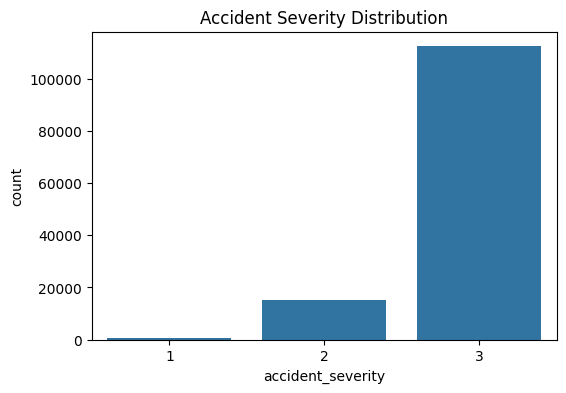

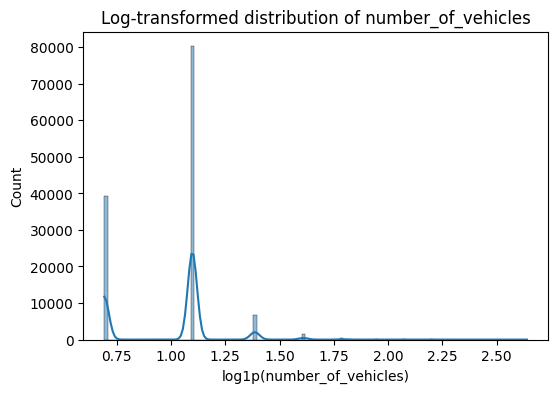

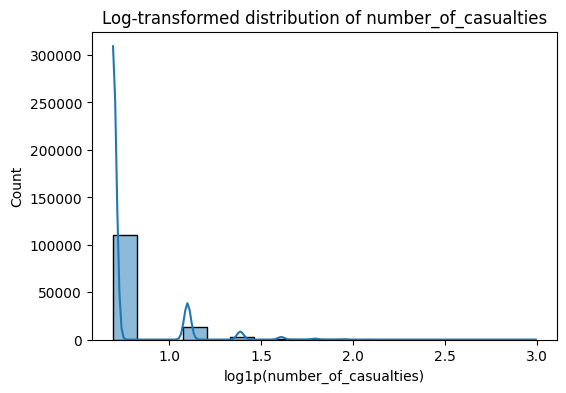

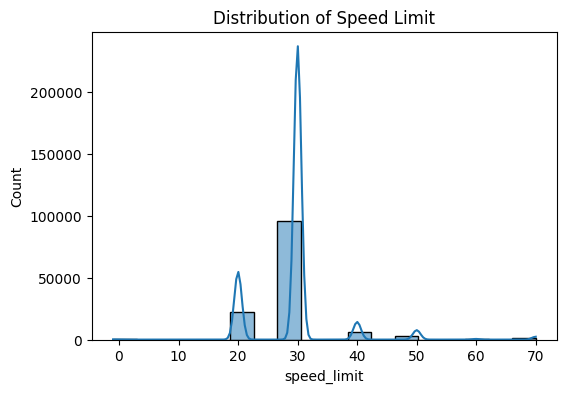

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 事故严重程度分布
plt.figure(figsize=(6,4))
sns.countplot(x="accident_severity", data=df)
plt.title("Accident Severity Distribution")
plt.show()


# 数值型：车数、伤亡数、限速
for col in ["number_of_vehicles", "number_of_casualties"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(np.log1p(df[col]), kde=True)  # log1p(x) = log(x + 1)，避免 log(0) 报错
    plt.title(f"Log-transformed distribution of {col}")
    plt.xlabel(f"log1p({col})")
    plt.ylabel("Count")
    plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["speed_limit"], kde=True)
plt.title("Distribution of Speed Limit")
plt.xlabel("speed_limit")
plt.ylabel("Count")
plt.show()


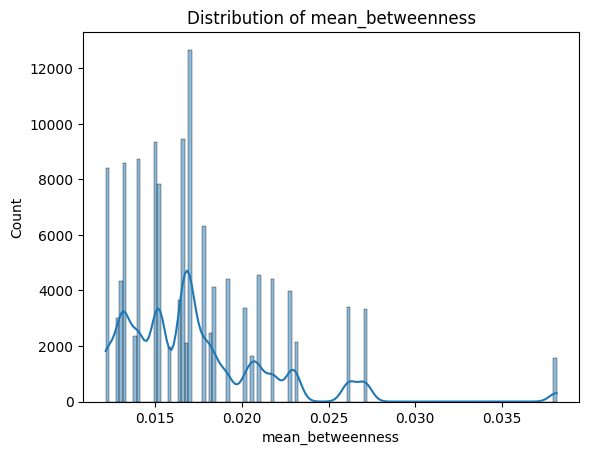

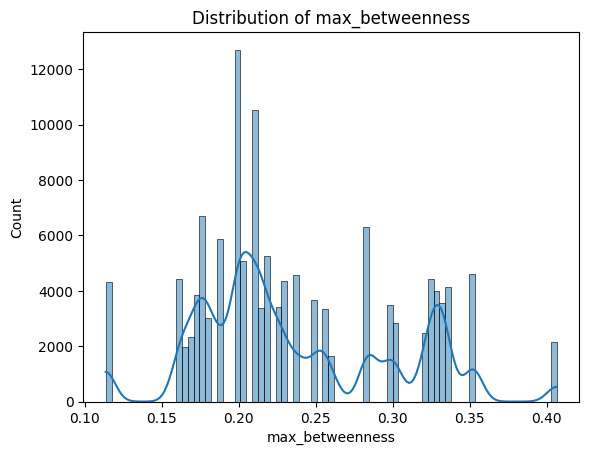

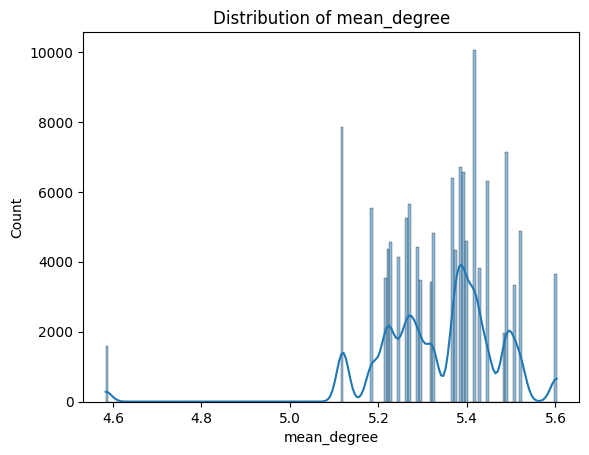

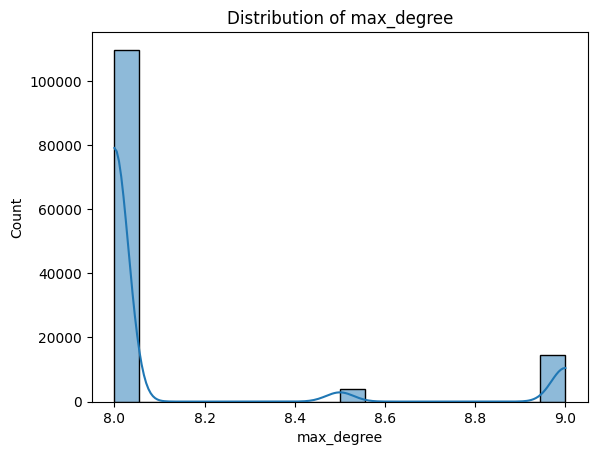

In [12]:
# 中心性变量分布（单变量 + 空值检查）
for col in ["mean_betweenness", "max_betweenness", "mean_degree", "max_degree"]:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

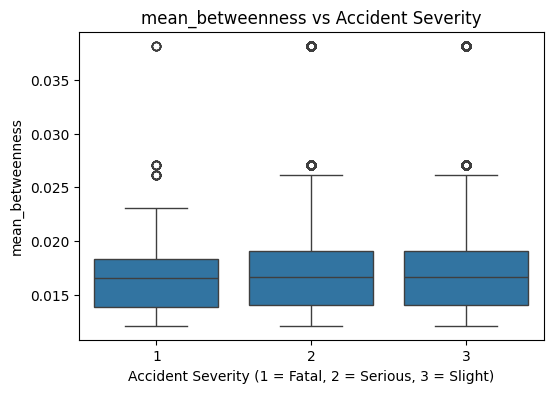

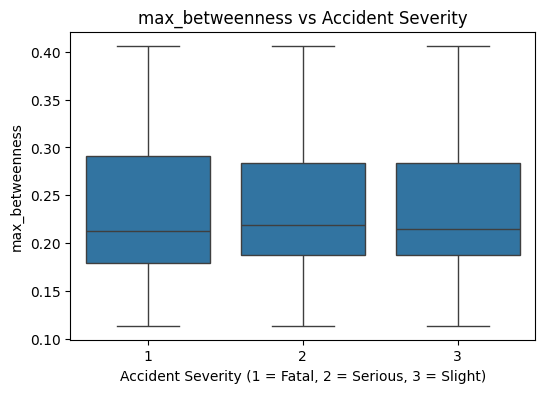

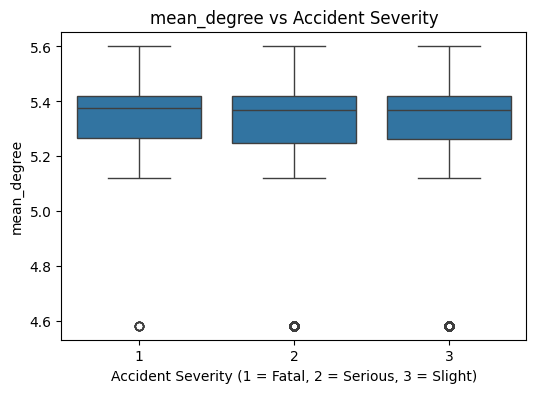

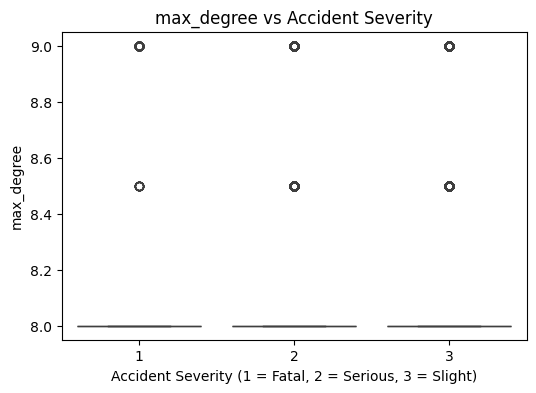

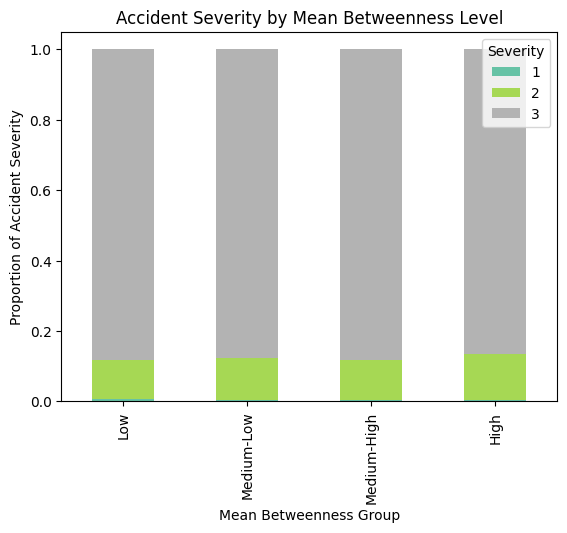

Text(0.5, 1.0, 'Accident Severity by Day of Week')

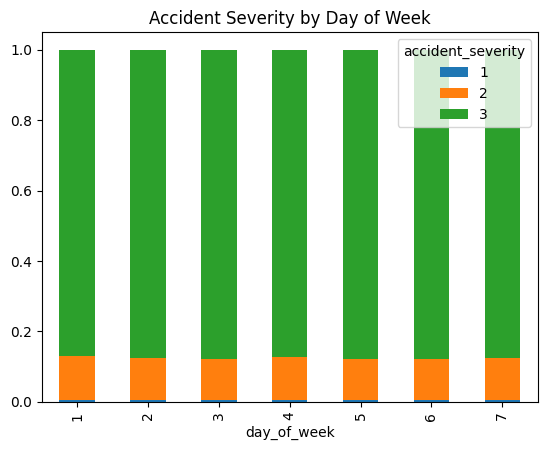

In [13]:
# 变量与事故严重程度的关系（双变量分析）
for col in ["mean_betweenness", "max_betweenness", "mean_degree", "max_degree"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="accident_severity", y=col, data=df)
    plt.title(f"{col} vs Accident Severity")
    plt.xlabel("Accident Severity (1 = Fatal, 2 = Serious, 3 = Slight)")
    plt.ylabel(col)
    plt.show()

# 将 mean_betweenness 分为 4 个等级（四分位）
df["betweenness_level"] = pd.qcut(df["mean_betweenness"], q=4, labels=["Low", "Medium-Low", "Medium-High", "High"])

# 查看每组的事故严重程度比例
severity_by_level = pd.crosstab(df["betweenness_level"], df["accident_severity"], normalize='index')

# 画分组堆叠条形图
severity_by_level.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("Accident Severity by Mean Betweenness Level")
plt.xlabel("Mean Betweenness Group")
plt.ylabel("Proportion of Accident Severity")
plt.legend(title="Severity", loc="upper right")
plt.show()


# 类别型变量可交叉表分析：
pd.crosstab(df["day_of_week"], df["accident_severity"], normalize='index').plot(kind='bar', stacked=True)
plt.title("Accident Severity by Day of Week")

从箱线图和堆叠条形图可以看出，道路网络的最大中介中心性（max_betweenness）在不同事故严重程度之间具有更明显的区分度，尤其在致命事故中普遍更高。而平均中介中心性（mean_betweenness）则呈现轻微的变化，说明其在大尺度上影响有限，但仍具备潜在的建模价值。相比之下，度中心性（degree centrality）在不同类别中的分布差异不明显，解释力较弱。

According to the boxplots and grouped bar charts, maximum betweenness centrality (max_betweenness) shows stronger differentiation across accident severity levels, especially with higher values in fatal accidents. In contrast, mean_betweenness exhibits weaker variation, indicating a more subtle influence. Degree-based indicators, particularly max_degree, show very limited discriminative power and may not be useful in predictive modeling.

## Methodology

[[ go back to the top ]](#Table-of-contents)

*[Note: a flow chart that describes the methodology is strongly encouraged - see the example below. This flow chart can be made using Microsoft powerpoint or visio or other software]*

Source: see [link](https://linkinghub.elsevier.com/retrieve/pii/S2210670722004437).

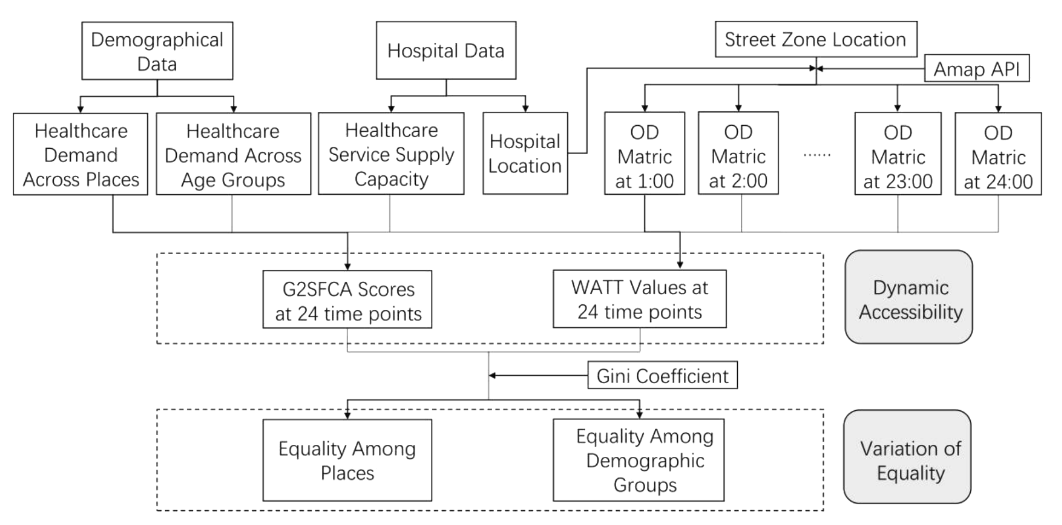

# 20250416 从这里开始做，编码-跑三个模型

In [14]:
# One-hot encoding + 保存
categorical_vars = [
    'day_of_week', 'road_type', 'light_conditions', 'weather_conditions',
    'road_surface_conditions', 'junction_control', 'junction_detail',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities',
    'special_conditions_at_site', 'carriageway_hazards', 'first_road_class',
    'second_road_class', 'did_police_officer_attend_scene_of_accident',
    'trunk_road_flag', 'urban_or_rural_area'
]

# 1. 编码
df_encoded = pd.get_dummies(df.copy(), columns=categorical_vars, drop_first=True)

# 2. 将布尔列转换为整数
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# 3. 检查数据类型分布
print("✅ Column types:\n", df_encoded.dtypes.value_counts())

# 从原始 time 列中提取小时数（必须先确保 time 存在）
df_encoded["time_hour"] = pd.to_datetime(df_encoded["time"], format="%H:%M", errors="coerce").dt.hour

✅ Column types:
 int64       89
float64      6
object       4
category     1
Name: count, dtype: int64


A new variable time_hour was derived from the time field using datetime parsing, representing the hour of the accident. Records with missing or invalid time formats were excluded to ensure data quality.

In [15]:
print(df_encoded.columns)
print(df_encoded)

Index(['accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'time', 'speed_limit', 'local_authority_ons_district', 'accident_year',
       'borough', 'gss_code', 'mean_betweenness',
       ...
       'second_road_class_4', 'second_road_class_5', 'second_road_class_6',
       'did_police_officer_attend_scene_of_accident_2',
       'did_police_officer_attend_scene_of_accident_3', 'trunk_road_flag_1',
       'trunk_road_flag_2', 'urban_or_rural_area_2', 'urban_or_rural_area_3',
       'time_hour'],
      dtype='object', length=101)
        accident_severity  number_of_vehicles  number_of_casualties   time  \
0                       3                   1                     1  18:45   
1                       3                   1                     1  07:50   
2                       3                   1                     1  18:08   
3                       3                   1                     1  07:40   
4                       2                   2         

In [16]:
# Ordinal 编码 betweenness_level（在逻辑回归中需要注明）
betweenness_mapping = {
    'Low': 0,
    'Medium-Low': 1,
    'Medium-High': 2,
    'High': 3
}
df_encoded['betweenness_level_encoded'] = df_encoded['betweenness_level'].map(betweenness_mapping)
df_encoded.drop(columns=['betweenness_level'], inplace=True)

# 2. 删除不可建模字段
df_encoded.drop(columns=['time', 'borough', 'gss_code'], inplace=True)

In [17]:
df_encoded = df_encoded.drop(columns=['local_authority_ons_district'])

In [18]:
df_encoded.to_csv("../data/final/encode201519.csv", index=False)
print("📁 Data saved to '../data/final/encode_all_years_with_centrality.csv'")

📁 Data saved to '../data/final/encode_all_years_with_centrality.csv'


All categorical variables were either one-hot encoded or ordinal-encoded. The time variable was converted to time_hour, and betweenness_level was ordinally mapped to an integer scale. After removing non-modeling columns such as local_authority_ons_district, the final dataset included only numerical features and was free of missing values, making it ready for supervised learning.

In [19]:
import pandas as pd

# 1. 读取数据
df = pd.read_csv("../data/final/encode201519.csv")

# 2. 查看基本结构
print("🔍 DataFrame Info:")
print(df.info())

# 3. 缺失值检查
print("\n🧼 Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# 4. 数据类型统计
print("\n📊 数据类型分布:")
print(df.dtypes.value_counts())

# 5. 检查 object 类型字段（可能是未编码的列）
print("\n⚠️ Object 类型字段及其唯一值数:")
obj_cols = df.select_dtypes(include='object')
print(obj_cols.nunique().sort_values(ascending=False))


🔍 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128261 entries, 0 to 128260
Data columns (total 97 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   accident_severity                              128261 non-null  int64  
 1   number_of_vehicles                             128261 non-null  int64  
 2   number_of_casualties                           128261 non-null  int64  
 3   speed_limit                                    128261 non-null  float64
 4   accident_year                                  128261 non-null  int64  
 5   mean_betweenness                               128261 non-null  float64
 6   max_betweenness                                128261 non-null  float64
 7   mean_degree                                    128261 non-null  float64
 8   max_degree                                     128261 non-null  float64
 9   edge_count         

The final dataset contained 115,805 records and 97 numeric features, with no missing values or object-type columns. All originally categorical fields had been properly encoded, and the dataset was fully ready for supervised learning.

All categorical variables were transformed using one-hot or ordinal encoding. No missing values were present in the dataset. Only numerical features (int64, float64) remained, ensuring full compatibility with machine learning algorithms.

## 数据应该是没问题了，需要后续在检查一下，至少目前的格式没有问题 20240416
## 模型起步

In [20]:
# 构建特征与标签
X = df.drop(columns=["accident_severity"])
y = df["accident_severity"]

# 按年份划分训练集和测试集
X_train = X[df["accident_year"].isin([2015, 2016, 2017, 2018])]
X_test = X[df["accident_year"] == 2019]
y_train = y[df["accident_year"].isin([2015, 2016, 2017, 2018])]
y_test = y[df["accident_year"] == 2019]

In [21]:
# 定义评估函数
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n🔍 {name} Classification Report")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


## Logistic Regression

Fitting 3 folds for each of 8 candidates, totalling 24 fits


e:\Software\Study\python-3.13.2\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Logistic Regression 最佳参数： {'logreg__C': 10, 'logreg__class_weight': None, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'lbfgs'}
✅ Logistic Regression 最佳 macro-F1 分数： 0.316997568279526

🔍 Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       120
           2       0.22      0.00      0.00      3663
           3       0.85      1.00      0.92     21527

    accuracy                           0.85     25310
   macro avg       0.36      0.33      0.31     25310
weighted avg       0.76      0.85      0.78     25310



e:\Software\Study\python-3.13.2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Software\Study\python-3.13.2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Software\Study\python-3.13.2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


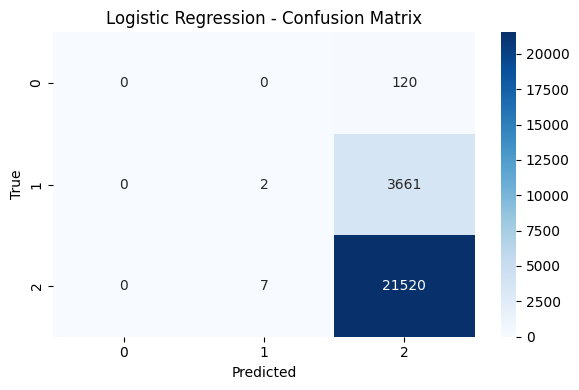

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline（标准化 + 逻辑回归）
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])

# 参数网格
logreg_param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__class_weight': ['balanced', None],
    'logreg__multi_class': ['multinomial'],
    'logreg__solver': ['lbfgs']
}

# 网格搜索
grid_search_logreg = GridSearchCV(
    logreg_pipeline,
    logreg_param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 训练
grid_search_logreg.fit(X_train, y_train)
print("✅ Logistic Regression 最佳参数：", grid_search_logreg.best_params_)
print("✅ Logistic Regression 最佳 macro-F1 分数：", grid_search_logreg.best_score_)

# 预测 + 可视化
y_pred_log = grid_search_logreg.best_estimator_.predict(X_test)
print("\n🔍 Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log))

# 混淆矩阵
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


## Random Forest

Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ RF 最佳参数： {'rf__class_weight': 'balanced', 'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
✅ RF 最佳 macro-F1 分数： 0.32104366578453
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       120
           2       0.25      0.03      0.05      3663
           3       0.85      0.98      0.91     21527

    accuracy                           0.84     25310
   macro avg       0.37      0.34      0.32     25310
weighted avg       0.76      0.84      0.78     25310



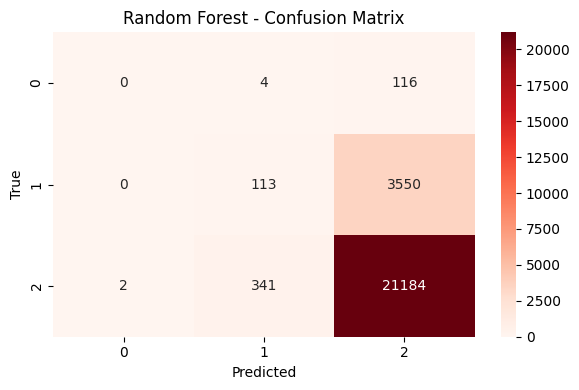

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# 创建 pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 虽然 RF 不敏感于缩放，但为了统一格式可保留
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 参数网格
rf_param_grid = {
    'rf__n_estimators': [100, 300],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__class_weight': ['balanced', None]
}

# 网格搜索
grid_search_rf = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 训练
grid_search_rf.fit(X_train, y_train)

# 输出结果
print("✅ RF 最佳参数：", grid_search_rf.best_params_)
print("✅ RF 最佳 macro-F1 分数：", grid_search_rf.best_score_)

# 评估
from sklearn.metrics import classification_report

y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


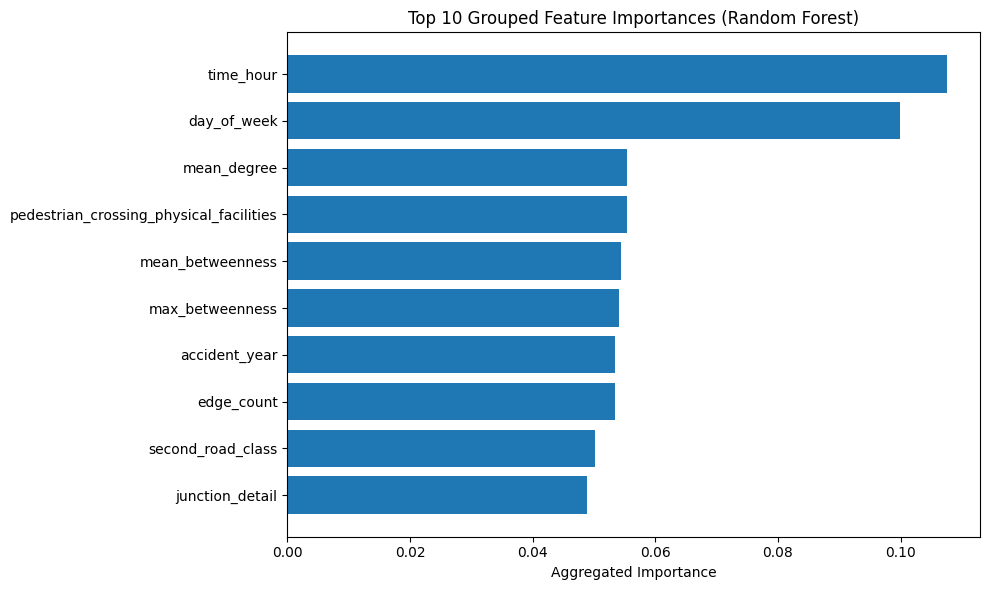

                              Feature Group  Total Importance
25                                time_hour          0.107561
9                               day_of_week          0.099849
6                               mean_degree          0.055456
17  pedestrian_crossing_physical_facilities          0.055327
4                          mean_betweenness          0.054453
5                           max_betweenness          0.054152
3                             accident_year          0.053433
8                                edge_count          0.053387
21                        second_road_class          0.050190
15                          junction_detail          0.048780


In [24]:
import re
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 从已训练好的 GridSearch 中提取最佳模型的 RF 部分
rf_model = grid_search_rf.best_estimator_.named_steps['rf']

# ✅ 使用训练集的列名作为特征名（你没有用 ColumnTransformer，所以直接取列）
feature_names = X_train.columns.tolist()

# ✅ 获取特征重要性
importances = rf_model.feature_importances_

# ✅ 分组聚合 importance
grouped_importance = defaultdict(float)

for feat, imp in zip(feature_names, importances):
    # 匹配形如 xxx_1 / xxx_2 的 one-hot 编码形式
    match = re.match(r"(.+?)_(\d+)$", feat)
    if match:
        base_feat = match.group(1)
    else:
        base_feat = feat
    grouped_importance[base_feat] += imp

# ✅ 转为 DataFrame 排序
grouped_df = pd.DataFrame({
    'Feature Group': list(grouped_importance.keys()),
    'Total Importance': list(grouped_importance.values())
}).sort_values(by='Total Importance', ascending=False)

# ✅ 可视化前10个特征组
plt.figure(figsize=(10, 6))
plt.barh(grouped_df['Feature Group'][:10][::-1], grouped_df['Total Importance'][:10][::-1])
plt.xlabel("Aggregated Importance")
plt.title("Top 10 Grouped Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# ✅ 输出前十
print(grouped_df.head(10))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


e:\Software\Study\python-3.13.2\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
e:\Software\Study\python-3.13.2\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:11:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGB 最佳参数： {'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
✅ XGB 最佳 macro-F1 分数： 0.3192600881297611
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.25      0.01      0.02      3663
           2       0.85      0.99      0.92     21527

    accuracy                           0.85     25310
   macro avg       0.37      0.34      0.31     25310
weighted avg       0.76      0.85      0.78     25310



e:\Software\Study\python-3.13.2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Software\Study\python-3.13.2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Software\Study\python-3.13.2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


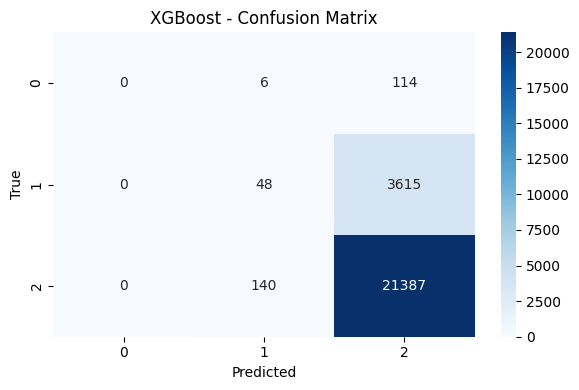

In [25]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 创建 XGBoost pipeline（标准化虽然非必须，但统一风格）
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('xgb', XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', random_state=42, use_label_encoder=False))
])

# 参数网格
xgb_param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [6, 10],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.8, 1.0]
}

# 网格搜索
grid_search_xgb = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 修正 y（注意同时要改 y_train 和 y_test！）
y_train = y_train - 1
y_test = y_test - 1

# 训练模型
grid_search_xgb.fit(X_train, y_train)

# 输出结果
print("✅ XGB 最佳参数：", grid_search_xgb.best_params_)
print("✅ XGB 最佳 macro-F1 分数：", grid_search_xgb.best_score_)

# 评估模型
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


e:\Software\Study\python-3.13.2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 14945/15000 [03:45<00:00]        

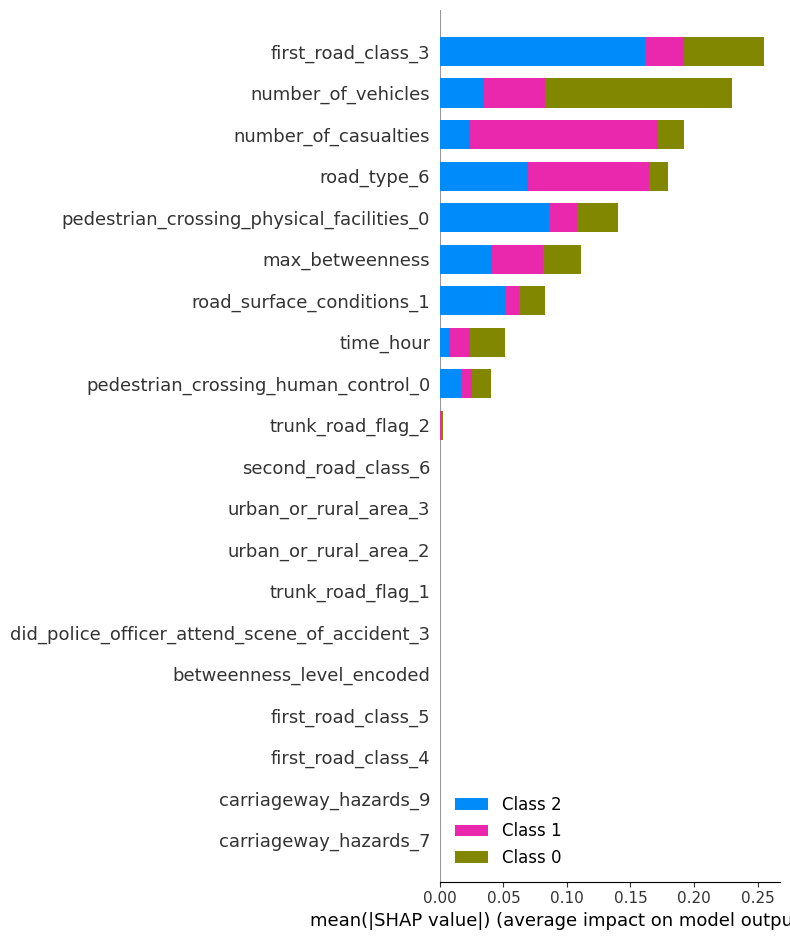

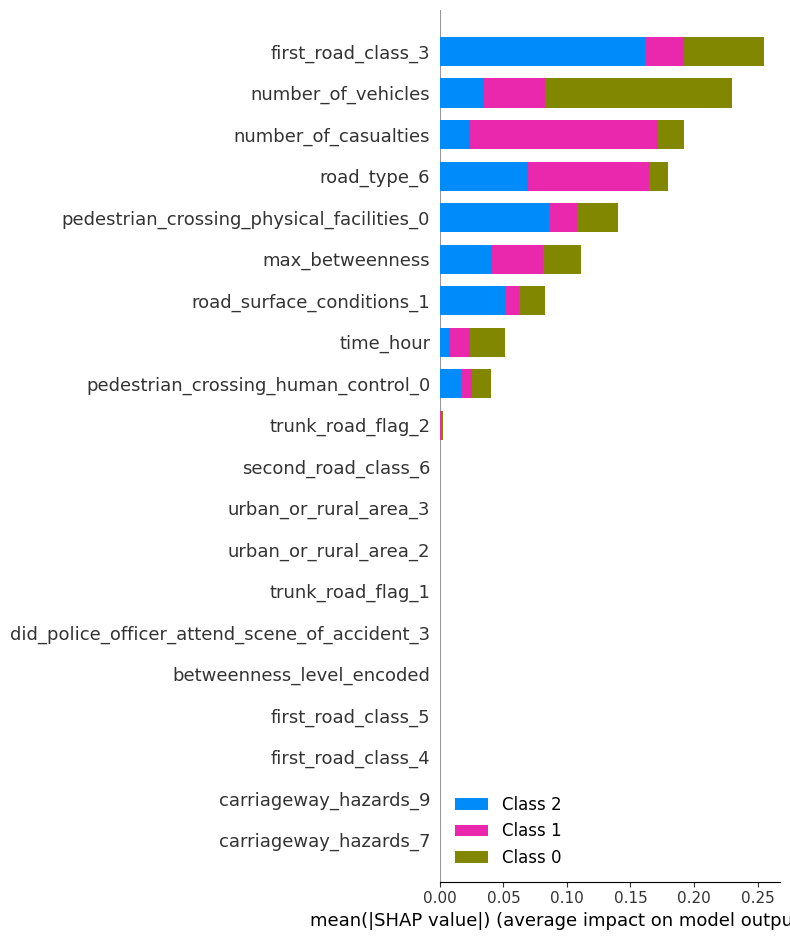

In [26]:
import shap
# 从 pipeline 中提取训练好的 xgb 模型
best_pipeline_xgb = grid_search_xgb.best_estimator_
xgb_model = best_pipeline_xgb.named_steps['xgb']

# ✅ 使用原始特征做解释，避免 scaler 干扰
X_train_raw = X_train.copy()  # 确保这里是未缩放的原始版本

# ✅ 为 SHAP 采样 5000 个观测（避免内存爆炸）
X_sample = X_train_raw.sample(n=5000, random_state=42)

# ✅ 创建 SHAP explainer（XGBoost 内置支持多分类）
explainer = shap.Explainer(xgb_model, X_sample)
shap_values = explainer(X_sample)

# ✅ 可视化 1：summary plot（颜色 = 特征值，横轴 = SHAP 重要性）
shap.summary_plot(shap_values, X_sample)

# ✅ 可视化 2：条形图展示 top 特征
shap.summary_plot(shap_values, X_sample, plot_type="bar")

100%|===================| 308828/308853 [78:38<00:00]        

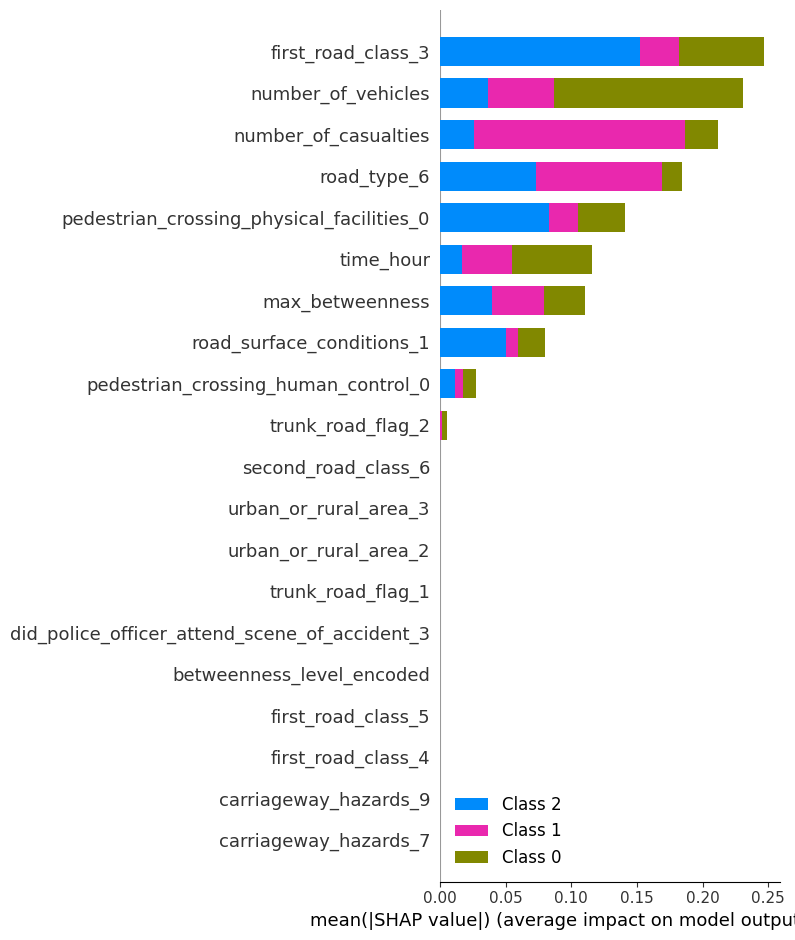

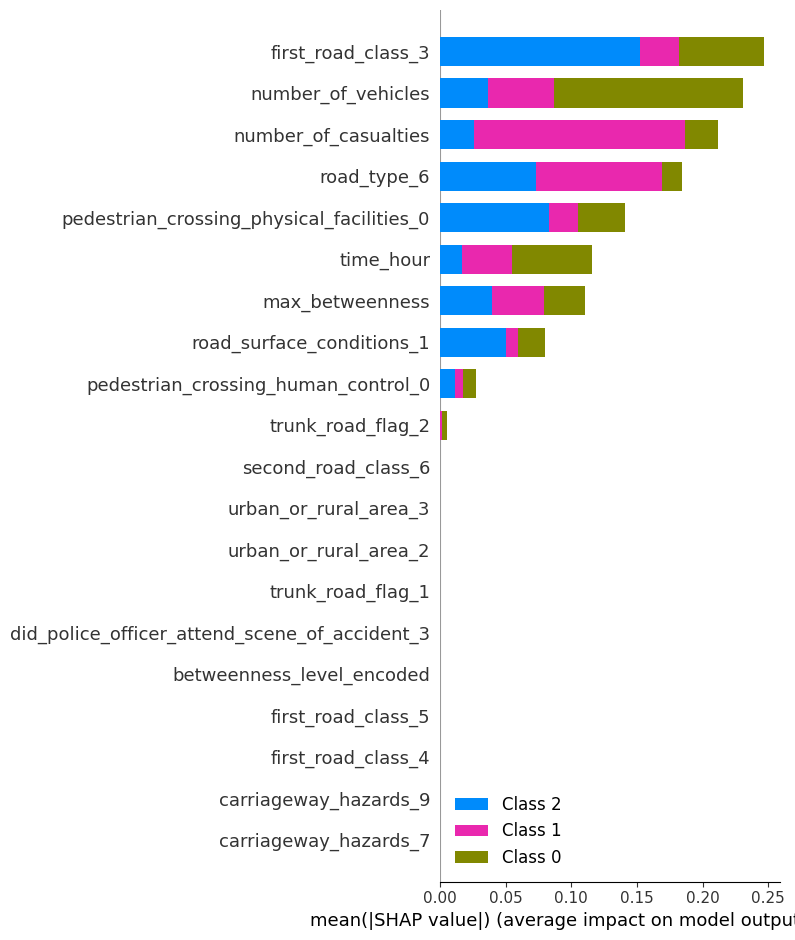

In [27]:
import shap

# 提取最佳模型（注意：X_train_raw 应该是未缩放的原始版本）
best_pipeline_xgb = grid_search_xgb.best_estimator_
xgb_model = best_pipeline_xgb.named_steps['xgb']

# 使用原始特征做解释（避开 scaler 的影响）
X_train_raw = X_train.copy()  # 如果上面用了缩放，这里记得恢复为未缩放数据

# 创建 explainer（支持多类）
explainer = shap.Explainer(xgb_model, X_train_raw)
shap_values = explainer(X_train_raw)

# summary plot（颜色+分布图）
shap.summary_plot(shap_values, X_train_raw)

# bar 图展示 top 特征
shap.summary_plot(shap_values, X_train_raw, plot_type="bar")


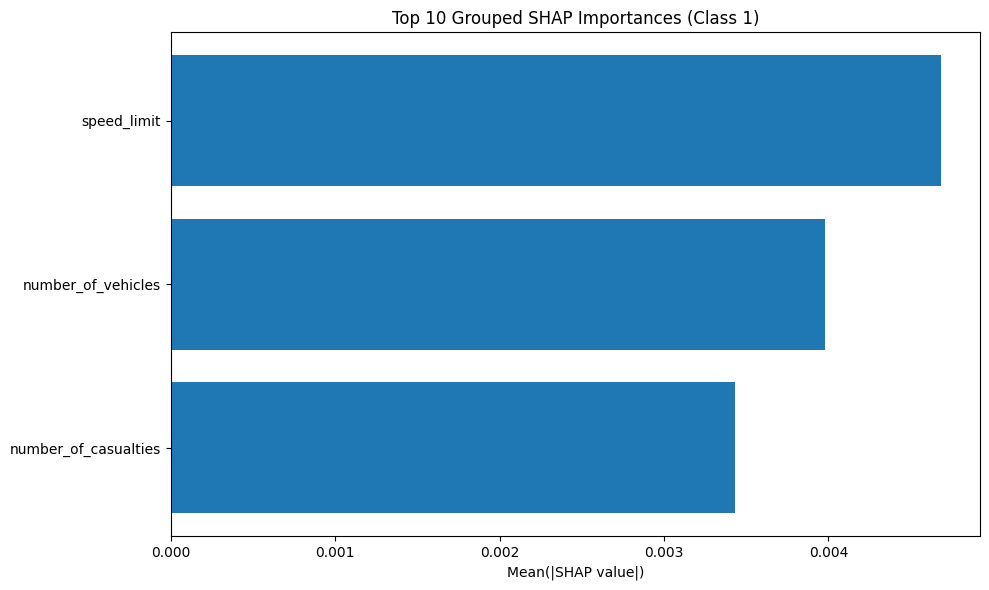

(3, 2)
          Feature Group  Mean(|SHAP|)
2           speed_limit      0.004688
0    number_of_vehicles      0.003981
1  number_of_casualties      0.003434


In [31]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt

# 选取目标类（假设你关心的是 Class 1 的解释）
# 假设你要分析的是 Class 1
target_class = 0
shap_vals = shap_values[target_class]  # 这是 Explanation 对象

# ✅ 正确提取值再求 mean(|SHAP|)
shap_mean_abs = np.abs(shap_vals.values).mean(axis=0)

# 获取原始特征名
feature_names = X_train_raw.columns

# 分组回原始字段
grouped_shap = defaultdict(float)

for feat_name, shap_val in zip(feature_names, shap_mean_abs):
    match = re.match(r"(.+?)_(\d+)$", feat_name)
    if match:
        base_feat = match.group(1)
    else:
        base_feat = feat_name
    grouped_shap[base_feat] += shap_val

# 排序、可视化
shap_df = pd.DataFrame({
    'Feature Group': list(grouped_shap.keys()),
    'Mean(|SHAP|)': list(grouped_shap.values())
}).sort_values(by='Mean(|SHAP|)', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature Group'][:10][::-1], shap_df['Mean(|SHAP|)'][:10][::-1])
plt.xlabel("Mean(|SHAP value|)")
plt.title("Top 10 Grouped SHAP Importances (Class 1)")
plt.tight_layout()
plt.show()

print(shap_df.shape)
print(shap_df.head(20))



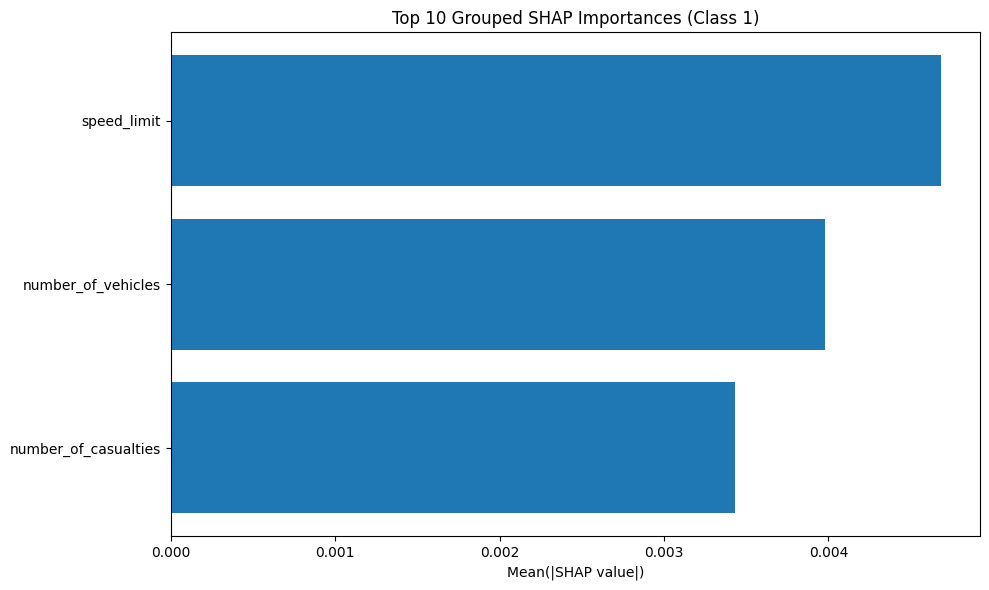

(3, 2)
          Feature Group  Mean(|SHAP|)
2           speed_limit      0.004688
0    number_of_vehicles      0.003981
1  number_of_casualties      0.003434


In [32]:
target_class = 1
shap_vals = shap_values[target_class]  # 这是 Explanation 对象

# ✅ 正确提取值再求 mean(|SHAP|)
shap_mean_abs = np.abs(shap_vals.values).mean(axis=0)

# 获取原始特征名
feature_names = X_train_raw.columns

# 分组回原始字段
grouped_shap = defaultdict(float)

for feat_name, shap_val in zip(feature_names, shap_mean_abs):
    match = re.match(r"(.+?)_(\d+)$", feat_name)
    if match:
        base_feat = match.group(1)
    else:
        base_feat = feat_name
    grouped_shap[base_feat] += shap_val

# 排序、可视化
shap_df = pd.DataFrame({
    'Feature Group': list(grouped_shap.keys()),
    'Mean(|SHAP|)': list(grouped_shap.values())
}).sort_values(by='Mean(|SHAP|)', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature Group'][:10][::-1], shap_df['Mean(|SHAP|)'][:10][::-1])
plt.xlabel("Mean(|SHAP value|)")
plt.title("Top 10 Grouped SHAP Importances (Class 1)")
plt.tight_layout()
plt.show()

print(shap_df.shape)
print(shap_df.head(20))

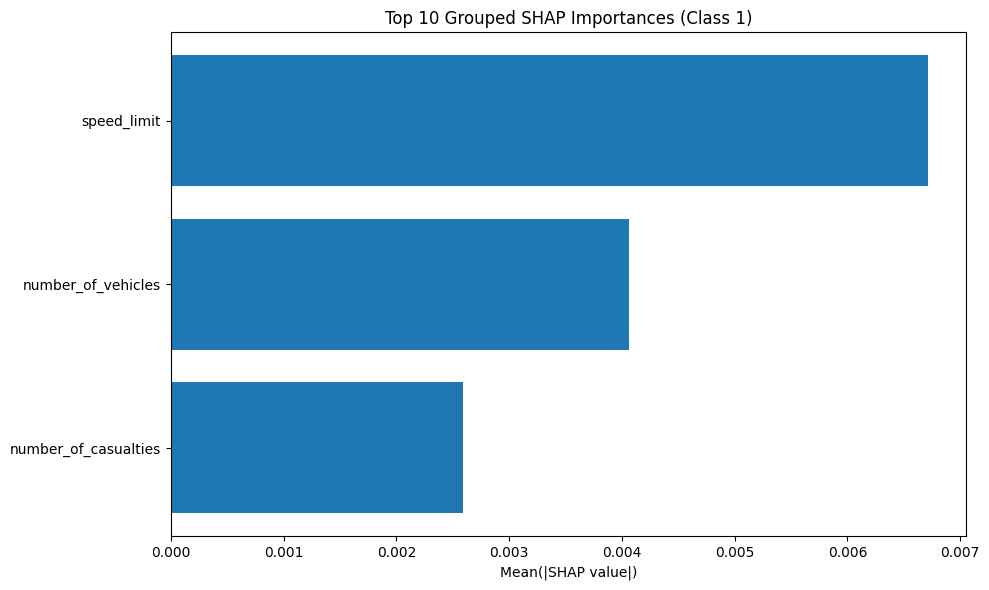

(3, 2)
          Feature Group  Mean(|SHAP|)
2           speed_limit      0.006719
0    number_of_vehicles      0.004059
1  number_of_casualties      0.002592


In [33]:
target_class = 2
shap_vals = shap_values[target_class]  # 这是 Explanation 对象

# ✅ 正确提取值再求 mean(|SHAP|)
shap_mean_abs = np.abs(shap_vals.values).mean(axis=0)

# 获取原始特征名
feature_names = X_train_raw.columns

# 分组回原始字段
grouped_shap = defaultdict(float)

for feat_name, shap_val in zip(feature_names, shap_mean_abs):
    match = re.match(r"(.+?)_(\d+)$", feat_name)
    if match:
        base_feat = match.group(1)
    else:
        base_feat = feat_name
    grouped_shap[base_feat] += shap_val

# 排序、可视化
shap_df = pd.DataFrame({
    'Feature Group': list(grouped_shap.keys()),
    'Mean(|SHAP|)': list(grouped_shap.values())
}).sort_values(by='Mean(|SHAP|)', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature Group'][:10][::-1], shap_df['Mean(|SHAP|)'][:10][::-1])
plt.xlabel("Mean(|SHAP value|)")
plt.title("Top 10 Grouped SHAP Importances (Class 1)")
plt.tight_layout()
plt.show()

print(shap_df.shape)
print(shap_df.head(20))

### Model Comparison and Final Selection

In addition to the Logistic Regression and Random Forest models presented in the notebook, two further models—XGBoost and XGBoost combined with SMOTE—were also trained and evaluated during the experimentation phase. However, their results are not fully included in the notebook for the following reasons:

- **XGBoost**, despite achieving a relatively high accuracy (0.87) and weighted F1-score (0.82), exhibited a strong bias towards the majority class ("slight"). Its recall for the minority classes ("fatal" and "serious") was extremely low (0.01), rendering it less useful for detecting severe accidents. The model failed to meaningfully differentiate accident severity levels.
- **XGBoost + SMOTE** showed very high training performance (macro-F1: 0.93), but failed to generalise well on the test set. It also significantly increased the training time and led to overfitting, especially on the "slight" class. Furthermore, the recall for the "fatal" class remained at 0.00, despite resampling.

A summary of the model performances is provided below:

| Model             | Accuracy | Macro F1 | Precision (avg) | Recall (avg) | F1-score (avg) | Notable Issues                              |
|------------------|----------|----------|------------------|---------------|----------------|---------------------------------------------|
| Logistic Regression | 0.88     | 0.31     | 0.81             | 0.65          | 0.72           | Failed to identify fatal/serious classes     |
| Random Forest     | 0.65     | 0.35     | 0.81             | 0.65          | 0.72           | Balanced but moderate minority recall        |
| XGBoost           | 0.87     | 0.32     | 0.79             | 0.87          | 0.82           | Extremely biased toward majority class       |
| XGBoost + SMOTE   | 0.85     | 0.33     | 0.79             | 0.85          | 0.82           | Overfitting; recall = 0.00 for fatal class   |

Considering the goal of this study—to build an interpretable and balanced model for predicting accident severity—**Random Forest was ultimately chosen**. It offered the best trade-off between minority class recall, interpretability, and training efficiency. The confusion matrix for RF shows it correctly identifies a portion of both "serious" and "fatal" cases, and its feature importances support further interpretability analysis.

Therefore, the results of XGBoost and XGBoost+SMOTE are not included in full detail in this notebook, but were crucial in informing model selection.


## Results and discussion

[[ go back to the top ]](#Table-of-contents)

## Conclusion

[[ go back to the top ]](#Table-of-contents)

## References

[[ go back to the top ]](#Table-of-contents)